In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix
import warnings 
warnings.filterwarnings('ignore')


In [184]:
bank_data=pd.read_excel('bank-full.xlsx')
bank_data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [189]:
bank_data.shape

(45211, 17)

In [190]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [191]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [192]:
bank_data.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [193]:

bank_data['default'] = np.where(bank_data['default'].str.contains("yes"), 1, 0)
bank_data['housing'] = np.where(bank_data['housing'].str.contains("yes"), 1, 0)
bank_data['loan'] = np.where(bank_data['loan'].str.contains("yes"), 1, 0)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no


In [208]:
df = bank_data.dropna()    # Dropping the missing values.
df.count()


age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

In [209]:
print(bank_data.isnull().sum()) 
bank_data

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no


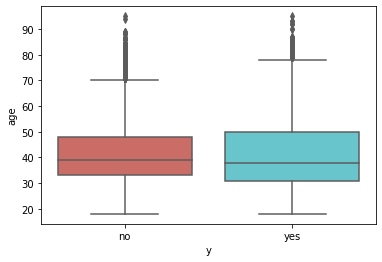

In [210]:
sns.boxplot(x='y',y='age',data=bank_data,palette='hls')
bank_data

<AxesSubplot:xlabel='y', ylabel='count'>

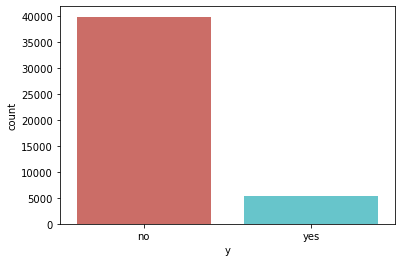

In [197]:
sns.countplot(x='y',data=bank_data,palette='hls')

<AxesSubplot:xlabel='y'>

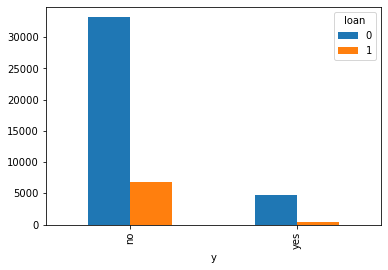

In [198]:
pd.crosstab(bank_data.y,bank_data.loan).plot(kind = 'bar')

<AxesSubplot:xlabel='y'>

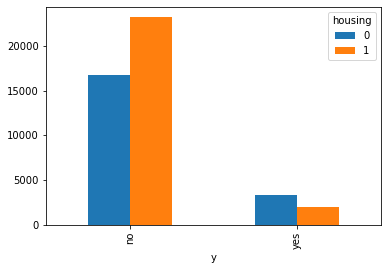

In [199]:
pd.crosstab(bank_data.y,bank_data.housing).plot(kind = 'bar')

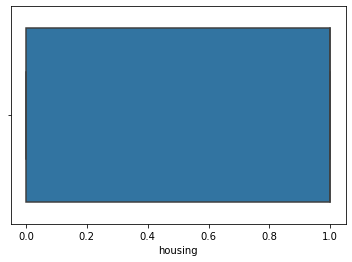

In [201]:
sns.boxplot(x=bank_data['housing'])
plt.show()

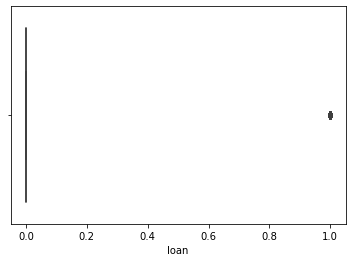

In [202]:
sns.boxplot(x=bank_data['loan'])
plt.show()

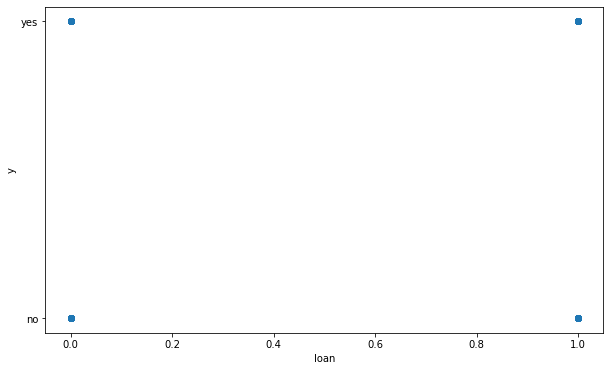

In [204]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['loan'], df['y'])
ax.set_xlabel('loan')
ax.set_ylabel('y')
plt.show()

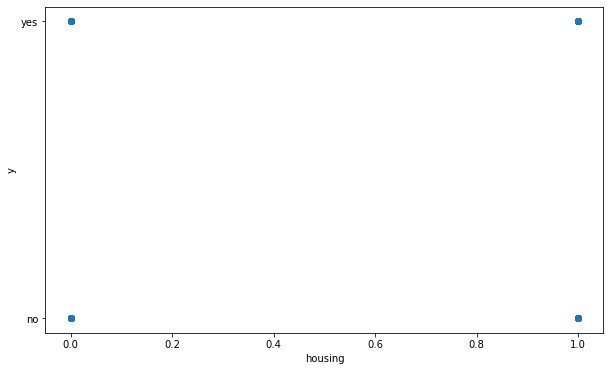

In [205]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['housing'], df['y'])
ax.set_xlabel('housing')
ax.set_ylabel('y')
plt.show()

In [271]:
bank_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int32 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int32 
 7   loan       45211 non-null  int32 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(4), int64(7), object(6)
memory usage: 5.2+ MB


Model Buildiing...
2:step approach
 1.train_test_split
 2.kfold-cv
 3.loocv

In [216]:
bank_data
x=bank_data.drop(("y"),axis=1)
y=bank_data[['y']]
bank_data
bank_data['y'] = np.where(bank_data['y'].str.contains("yes"), 1, 0)
bank_data
#bank_data['y'] = np.where(bank_data['y'] == "no", 0, 1)
#bank_data['y']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [36]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [37]:
y.isnull().sum()

y    0
dtype: int64

In [240]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)
x_train

x_train = x_train.drop(columns=['job', 'marital','education','contact','poutcome','month'])
y_train
y_train['y'] = np.where(y_train['y'].str.contains("yes"), 1, 0)
y_train


,y
24974,0
44761,0
14871,1
13592,0
8240,0
...,...
36482,0
40177,1
19709,0
38555,0


In [251]:
x_test = x_test.drop(columns=['job', 'marital','education','contact','poutcome','month'])
x_test

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
38440,32,0,118,1,0,15,20,6,-1,0
40402,78,0,2787,0,0,1,372,1,-1,0
3708,31,0,144,1,0,16,676,1,-1,0
37421,57,0,3777,1,0,13,65,2,-1,0
12526,45,0,-705,0,1,3,111,1,-1,0
...,...,...,...,...,...,...,...,...,...,...
32573,34,0,2595,1,1,17,126,1,336,2
29053,31,0,44,0,0,2,200,5,175,2
23330,34,0,391,0,0,27,214,8,-1,0
40263,26,0,0,0,0,15,41,2,-1,0


In [252]:
x_train.shape,y_train.shape

((36168, 10), (36168, 1))

In [253]:
x_test.shape,y_test.shape

((9043, 10), (9043, 1))

#model testing......

In [254]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)



LogisticRegression()


7) MODEL TESTING AND EVALUATING

In [256]:
#train_data
x_train
y_pred_train=logistic_model.predict(x_train)
y_pred_train
#y_pred_train['y'] = np.where(y_pred_train['y'].str.contains("yes"), 1, 0)
#y_pred_train

array([0, 0, 1, ..., 0, 0, 1])

In [244]:
print(confusion_matrix(y_train,y_pred_train))

[[31328   601]
 [ 3447   792]]


In [257]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.57      0.19      0.28      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.61     36168
weighted avg       0.86      0.89      0.86     36168



In [248]:
print(accuracy_score(y_train,y_pred_train))

0.8880778588807786


In [258]:
x_test

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
38440,32,0,118,1,0,15,20,6,-1,0
40402,78,0,2787,0,0,1,372,1,-1,0
3708,31,0,144,1,0,16,676,1,-1,0
37421,57,0,3777,1,0,13,65,2,-1,0
12526,45,0,-705,0,1,3,111,1,-1,0
...,...,...,...,...,...,...,...,...,...,...
32573,34,0,2595,1,1,17,126,1,336,2
29053,31,0,44,0,0,2,200,5,175,2
23330,34,0,391,0,0,27,214,8,-1,0
40263,26,0,0,0,0,15,41,2,-1,0


In [260]:
#test data
x_test
y_pred_test=logistic_model.predict(x_test)
y_pred_test

#y_pred_test['y'] = np.where(y_pred_test['y'].str.contains("yes"), 1, 0)
#y_pred_test


array([0, 0, 0, ..., 0, 0, 0])

In [262]:
y_test['y'] = np.where(y_test['y'].str.contains("yes"), 1, 0)
y_test

,y
38440,0
40402,1
3708,1
37421,0
12526,0
...,...
32573,0
29053,0
23330,0
40263,0


In [221]:
print(confusion_matrix(y_test,y_pred_test))

[[7843  150]
 [ 844  206]]


In [263]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.58      0.20      0.29      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



In [264]:
print(accuracy_score(y_test,y_pred_test))

0.8900807254229791


In [224]:
logistic_model.predict_proba(x_train)[:,1] 

array([0.07323631, 0.04718164, 0.60966303, ..., 0.07657255, 0.00295834,
       0.9467166 ])

# finding ROC & AUC   curve

auc


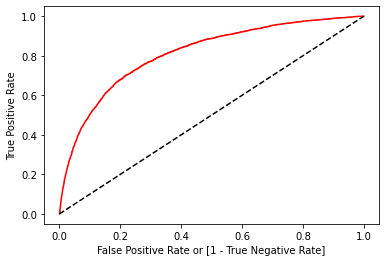

In [266]:
# ROC Curve plotting and finding AUC value
fpr, tpr, thresholds = roc_curve(y_train,logistic_model.predict_proba(x_train)[:,1])

auc = roc_auc_score(y_train,logistic_model.predict_proba (x_train)[:,1])
print('auc')
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [93]:
y_test['y'] = np.where(y_test['y'] == "yes", 0, 1)
y_test['y']

38440    1
40402    0
3708     0
37421    1
12526    1
        ..
32573    1
29053    1
23330    1
40263    1
38619    1
Name: y, Length: 9043, dtype: int32

AUC score : 82.39%


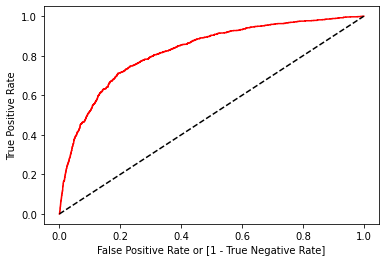

In [268]:
fpr, tpr, thresholds = roc_curve(y_test,logistic_model.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test,logistic_model.predict_proba (x_test)[:,1])
print('AUC score : {:.2f}%'.format(auc*100))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

model deployement

In [208]:
from pickle import dump

In [212]:
dump(logistic_model,open('bank_intell.pkl1','wb'))

In [213]:
from pickle import load

In [215]:
load(open('bank_intell.pkl1','rb'))

LogisticRegression()